In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Explain the dataset

In [3]:
df= pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Text(0.5, 1.0, 'Comparison of different advertising mediums')

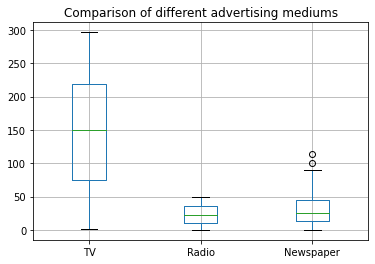

In [18]:
df[['TV','Radio','Newspaper']].boxplot()
plt.title("Comparison of different advertising mediums")

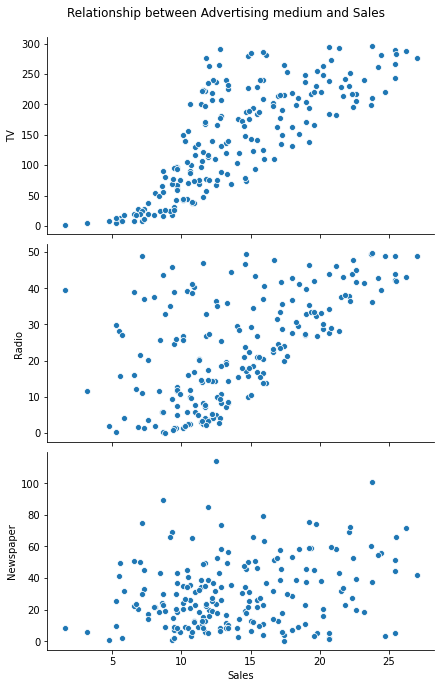

In [63]:
sns.pairplot(df, y_vars=['TV','Radio','Newspaper'],x_vars ='Sales', height=3, aspect=2,kind='scatter').fig.suptitle("Relationship between Advertising medium and Sales",y=1.04)
plt.show()

Amount invested in TV advertisements are far more than other mediums.

On comparing the sales with the advertising mediums, sales and Tv investments are proportional.More sales are acquired with less amount invested in Radio and Newspaper compared to TV

### 2. Check the summary statistics and discuss the max, min, avg, median, and percentiles.

In [29]:
import researchpy as rp
rp.summary_cont(df[['TV','Radio','Newspaper']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,TV,200.0,147.0425,85.8542,6.0708,135.0711,159.0139
1,Radio,200.0,23.2640,14.8468,1.0498,21.1938,25.3342
2,Newspaper,200.0,30.5540,21.7786,1.5400,27.5172,33.5908


In [9]:
df[['TV','Radio','Newspaper']].describe()

,TV,Radio,Newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


### 3. The manager wants to find out whether the same amount was spent for the three advertisements (TV , Radio and Newspaper). Comment on your findings.

H0: Amount spent on 3 advertising mediums are same

H1: Amount spent on atleast one advertising mediums are different

In [16]:
df_TV=df['TV']
df_Radio=df['Radio']
df_News=df['Newspaper']

In [17]:
from scipy.stats import f_oneway

Fscore, p = f_oneway(df_TV,df_Radio,df_News)

In [21]:
print('F value is :',Fscore)
print("p is :",p)
alpha=.05

if p > alpha:
    print('Sample accept null hypothesis')
else:
    print('Sample fails to accept null hypothesis')

F value is : 358.8514595342597
p is : 4.552931539744962e-103
Sample fails to accept null hypothesis


Inference: We fail to accept the null hypothesis. Hence the amount spent on three different mediums are different.